In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data=pd.read_csv('train.csv',index_col='Id')
data_y=data['SalePrice']
data_x=data.iloc[:,:-1]


test_x=pd.read_csv('test.csv',index_col='Id')

all_data=pd.concat([data_x,test_x],axis=0)
all_data['HouseYear']=all_data['YrSold']-all_data['YearBuilt']
print(all_data.shape)
print(data_x.shape)
print(test_x.shape)

(2919, 80)
(1460, 79)
(1459, 79)


In [2]:
#finding columns with nan value
nan_list=[]
for i in range(all_data.shape[1]):
    gg=list(all_data.iloc[:,i].unique())
    if np.nan in gg:
        print(all_data.columns[i])
        nan_list.append(all_data.columns[i])
    #print(all_data.iloc[:,i].unique())

MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [3]:
#fill in missing value by each modes

cols = nan_list
all_data[cols]=all_data[cols].fillna(all_data.mode().iloc[0])
data[cols]=data[cols].fillna(data.mode().iloc[0])
#pd.pivot_table(all_data.fillna('missing'),values='OverallQual',index='MSZoning',aggfunc='count')
#print(pd.pivot_table(all_data,values='OverallQual',index='MSZoning',aggfunc='count'))
#all_data['MSZoning']=all_data['MSZoning'].fillna('RL')
#print(pd.pivot_table(all_data,values='OverallQual',index='MSZoning',aggfunc='count'))

In [4]:
import seaborn as sns
sns.set()
for col in data_x.columns:
    if col in numeric_list:
        x=data[col]
        target=data_y
        plt.scatter(x,target)
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()
    else:
        sns.stripplot(x=col, y="SalePrice", data=data)
        plt.show()
    

NameError: name 'numeric_list' is not defined

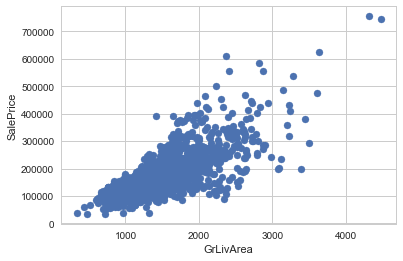

In [43]:
%matplotlib inline
sns.set()
sns.set_style("whitegrid")
x=data['GrLivArea']
target=data_y
plt.scatter(x,target)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [42]:
data=data[data['GrLivArea']<4500]

data_y=data['SalePrice']
data_x=data.iloc[:,:-1]

all_data=pd.concat([data_x,test_x],axis=0)
all_data['HouseYear']=all_data['YrSold']-all_data['YearBuilt']
print(all_data.shape)
print(data_x.shape)
print(test_x.shape)

(2917, 80)
(1458, 79)
(1459, 79)


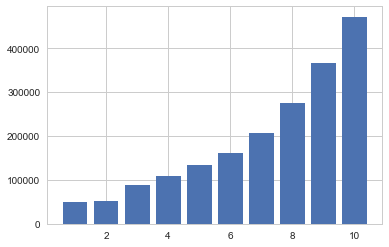

In [44]:
pv_table=pd.pivot_table(data,values='SalePrice',index='OverallQual',aggfunc='mean')
target=pv_table.values
target=target.reshape([1,-1])[0]
x=pv_table.index

plt.bar(x,target,width=0.8,align='center')
plt.show()

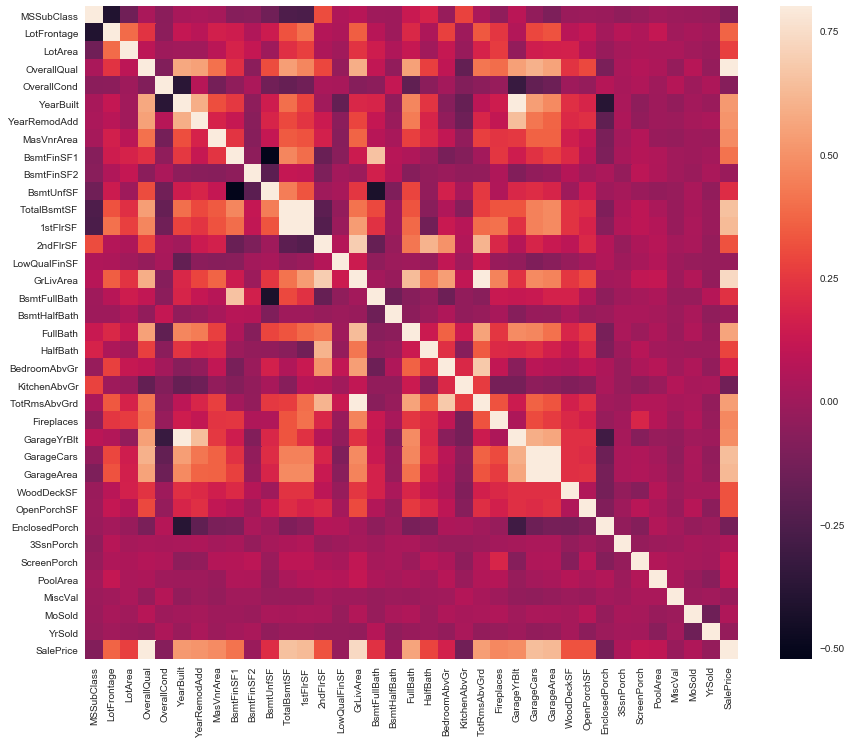

In [9]:
import seaborn as sns
%matplotlib inline
sns.set()
'''
numeric_part=data_x[numeric_list]
numeric_part=pd.concat([numeric_part,data_y],axis=1)
cm=np.corrcoef(numeric_part.values.T)
sns.set(font_scale=10)
plt.figure(figsize=(120,120))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=numeric_part.columns
               ,xticklabels=numeric_part.columns)

plt.show()
'''

corrmat = data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [10]:
feature_importane=corrmat.iloc[-1]
feature_importane.sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64

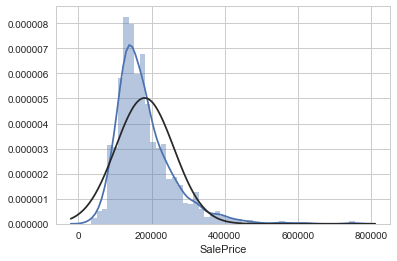

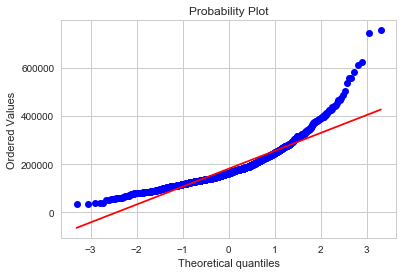

In [45]:
from scipy.stats import norm
from scipy import stats
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

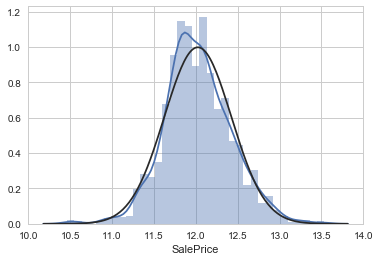

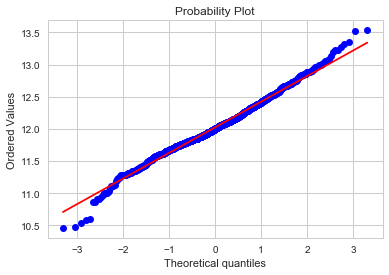

In [46]:
data['SalePrice']=np.log(data['SalePrice'])
data_y=data['SalePrice']
all_data=pd.concat([data_x,test_x],axis=0)
all_data['HouseYear']=all_data['YrSold']-all_data['YearBuilt']

from scipy.stats import norm
from scipy import stats
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

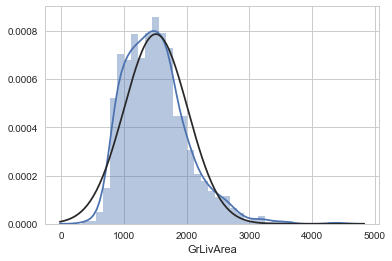

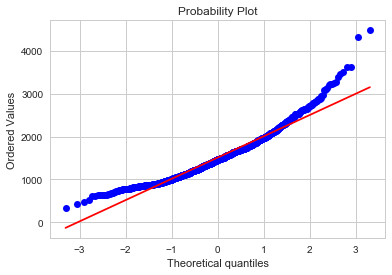

In [47]:
from scipy.stats import norm
from scipy import stats
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

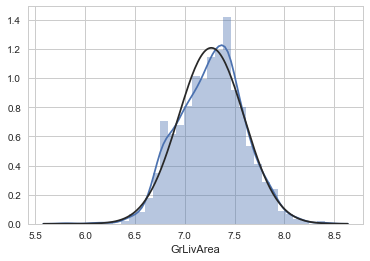

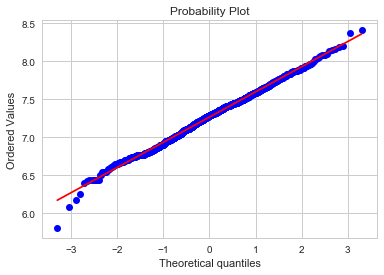

In [48]:
all_data['GrLivArea']=np.log(all_data['GrLivArea'])
data['GrLivArea']=np.log(data['GrLivArea'])

all_data=pd.concat([data_x,test_x],axis=0)
all_data['HouseYear']=all_data['YrSold']-all_data['YearBuilt']

from scipy.stats import norm
from scipy import stats
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

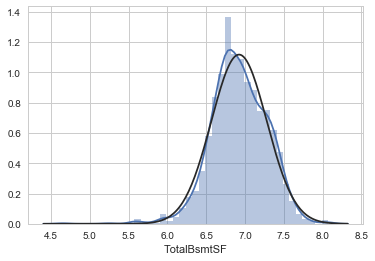

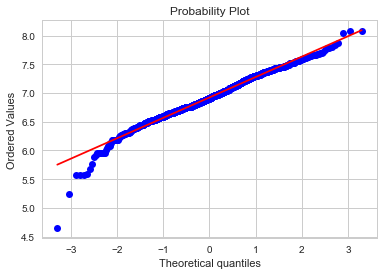

In [57]:
from scipy.stats import norm
from scipy import stats
sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [54]:
data['HasBst']=pd.Series(0, index=data.index)
data.loc[data['TotalBsmtSF']>0,'HasBst']=1
data.loc[data['HasBst']==1,'TotalBsmtSF']=np.log(data.loc[data['HasBst']==1,'TotalBsmtSF'])



In [58]:
dummy=all_data[['FullBath','Fireplaces','GarageCars','TotRmsAbvGrd']].astype(str)
dummy=pd.get_dummies(dummy)
dummy=dummy.reset_index(drop=True)

In [59]:
adj_x=all_data[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','2ndFlrSF','GarageArea','HouseYear','YearRemodAdd','GarageArea']]
adj_x=adj_x.fillna(0)
#adj_x=pd.concat([adj_x,dummy],axis=1)
#print(adj_x.head(5))
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
transform_x=sc.fit_transform(adj_x)
#transform_x=pd.concat([pd.DataFrame(sc.fit_transform(adj_x)),dummy.astype(float)],axis=1)

X=transform_x[:1458]
test_X=transform_x[1458:]
print(transform_x.shape)
print(X.shape)
print(test_X.shape)

(2917, 9)
(1458, 9)
(1459, 9)


In [60]:


from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.3,random_state=10)
slr=LinearRegression()
slr.fit(X_train,y_train)

#print('training result:',slr.score(X_train,y_train))
#print('testing result:',slr.score(X_test,y_test))
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)


from sklearn.metrics import mean_squared_error
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error((y_train), (y_train_pred))),
        np.sqrt(mean_squared_error((y_test), (y_test_pred)))))

RMSE train: 0.151, test: 0.151


In [61]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0,alpha=1,l1_ratio=0.01,max_iter=1000)
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.3,random_state=10)

regr.fit(X_train,y_train)
#print('training result:',regr.score(X_train,y_train))
#print('testing result:',regr.score(X_test,y_test))

y_train_pred=regr.predict(X_train)
y_test_pred=regr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error((y_train), (y_train_pred))),
        np.sqrt(mean_squared_error((y_test), (y_test_pred)))))

RMSE train: 0.177, test: 0.177


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.3,random_state=10)
est = GradientBoostingRegressor(n_estimators=500,learning_rate=0.07,max_depth=3, random_state=1,loss='ls')
est.fit(X_train, y_train)
#print('training result:',est.score(X_train,y_train))
#print('testing result:',est.score(X_test,y_test))
y_train_pred=est.predict(X_train)
y_test_pred=est.predict(X_test)

from sklearn.metrics import mean_squared_error
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error((y_train), (y_train_pred))),
        np.sqrt(mean_squared_error((y_test), (y_test_pred)))))
#RMSE train: 0.079, test: 0.148

RMSE train: 0.069, test: 0.156


In [63]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(est, X, data_y, cv=5)
print('RMSE: %.3f' % (
        np.sqrt(mean_squared_error((data_y), (predicted)))))
#RMSE: 0.150

RMSE: 0.156


In [64]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.3,random_state=10)
forest=RandomForestRegressor(n_estimators=500)
forest.fit(X_train,y_train)

y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
from sklearn.metrics import mean_squared_error
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error((y_train), (y_train_pred))),
        np.sqrt(mean_squared_error((y_test), (y_test_pred)))))
#RMSE train: 0.067, test: 0.163

RMSE train: 0.058, test: 0.162


In [65]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(forest, X, data_y, cv=5)
print('RMSE: %.3f' % (
        np.sqrt(mean_squared_error((data_y), (predicted)))))
#RMSE: 0.158

RMSE: 0.156


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.3,random_state=10)
est = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
est.fit(X_train, y_train)
#print('training result:',est.score(X_train,y_train))
#print('testing result:',est.score(X_test,y_test))
y_train_pred=est.predict(X_train)
y_test_pred=est.predict(X_test)

from sklearn.metrics import mean_squared_error
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error((y_train), (y_train_pred))),
        np.sqrt(mean_squared_error((y_test), (y_test_pred)))))

RMSE train: 0.064, test: 0.156


In [158]:
predicted = est.predict(test_X)

hello=pd.DataFrame(predicted)
hello['Id']=hello.index+1461
hello['SalePrice']=np.exp(hello[0])
del hello[0]
hello.to_csv('answer.csv',index=None)